# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw2_123456789_987654321.ipynb` if you submitted in pairs and `hw2_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: *** 304866551 204118616 ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import queue

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x7fbea8859e50>, <__main__.Node at 0x7fbe48a19450>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [6]:
#############################################################################
# TODO: Find the columns with missing values and remove them from the data.#
#############################################################################

# check missing values
# data.isnull().sum()

data = data.dropna(axis=1)

#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

We will split the dataset to `Training` and `Testing` datasets.

In [7]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [8]:
y.shape

(8124,)

## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [9]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    classes, classes_count = np.unique(data[:, -1], return_counts=True)
    classes_total = classes_count.sum()
    gini = 1 - np.sum(np.square(classes_count/classes_total))
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [10]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    classes, classes_count = np.unique(data[:, -1], return_counts=True)
    classes_total = classes_count.sum()
    p_i = classes_count / classes_total
    entropy = -np.sum(p_i*(np.log2(p_i)))
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [11]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906085)

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [12]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    impurity_values = 0.0
    feature_col = data[:, feature]
    feature_values, feature_count = np.unique(feature_col, return_counts=True)
    feature_total = feature_count.sum()

    if gain_ratio:
        info_gain = goodness_of_split(data, feature, calc_entropy, gain_ratio=False)
        p_i = feature_count/feature_total
        split_info = -np.sum(p_i*np.log2(p_i))
        goodness = info_gain / split_info
    else:
        for f_val, f_count in zip(feature_values, feature_count):
            S_v = data[feature_col == f_val]
            impurity_values += (f_count/feature_total) * impurity_func(S_v)
        goodness = impurity_func(data) - impurity_values
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness    

In [13]:
goodness_of_split(data=data.values, feature=0, impurity_func=calc_gini, gain_ratio=False)

0.0199596578344422

## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [14]:
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic
    functionality as described above. It is highly recommended that you
    first read and understand the entire exercise before diving into this class.
    """

    def __init__(self, feature, value, data, depth=0):
        self.feature = feature  # column index of criteria being tested
        self.value = value
        self.data = data
        self.depth = depth

        self.children = []
        self.pred = None
        self.leaf = False
        self.features_used = []

    def add_child(self, node):
        self.children.append(node)

    def add_used_feature(self, feature):
        self.features_used.append(feature)

    def set_pred(self):
        vals, count = np.unique(self.data[:, -1], return_counts=True)
        if len(vals) == 1:
            self.pred = vals[0]
        else:
            self.pred = vals[0] if count[0] > count[1] else vals[1]

    def set_children(self, feature):
        # creating descendant for the current node
        best_feature_col = self.data[:, feature]
        best_feature_values = np.unique(best_feature_col)

        for f_val in best_feature_values:
            child_node = DecisionNode(None, f_val, self.data[best_feature_col == f_val], self.depth + 1)
            child_node.features_used = self.features_used.copy()
            self.add_child(child_node)

    def get_best_decision_feature(self, impurity, gain_ratio, chi):
        # initial variables
        num_features = self.data.shape[1]
        features = [f for f in list(range(num_features - 1)) if f not in self.features_used]
        features_gain_dict = {}
        best_feature = None

        # compute the gain for each feature
        for feature in features:
            # chi-square validation
            if chi != 1:
                chi_square = self.compute_chi_square(feature)
                df = self.compute_df(feature)
                if chi_square <= chi_table[df][chi]:
                    continue

            # compute gain info and store it in dictionary
            gain = goodness_of_split(self.data, feature, impurity, gain_ratio)
            features_gain_dict[feature] = gain

        # get the best decision feature by the maximum gain info
        if len(features_gain_dict) > 0:
            best_feature = max(features_gain_dict, key=features_gain_dict.get)

        return best_feature

    def compute_depth(self):
        if len(self.children) == 0:
            return 0
        else:
            max_values = []
            for child in self.children:
                max_values.append(child.compute_depth())
            return 1 + max(max_values)

    def compute_chi_square(self, feature):
        vals, counts = np.unique(self.data[:, -1], return_counts=True)
        total = counts.sum()

        p_y_0 = counts[0] / total
        p_y_1 = counts[1] / total

        feature_col = self.data[:, feature]
        feature_values, feature_count = np.unique(feature_col, return_counts=True)

        chi_square_sum = 0
        for f_val, f_count in zip(feature_values, feature_count):
            D_f = f_count
            vals_f, counts_f = np.unique(self.data[feature_col == f_val][:, -1], return_counts=True)
            p_f, n_f = self.calc_instances_per_class(vals_f, counts_f)

            E_0 = D_f * p_y_0
            E_1 = D_f * p_y_1

            chi_square_sum += (np.square(p_f - E_0) / E_0) + (np.square(n_f - E_1) / E_1)

        return chi_square_sum

    def compute_df(self, feature):
        c_vals, c_counts = np.unique(self.data[:, -1], return_counts=True)
        num_of_classes = len(c_vals)
        f_vals, f_count = np.unique(self.data[:, feature], return_counts=True)
        num_of_features = len(f_vals)

        df = (num_of_classes - 1) * (num_of_features - 1)
        return df if df > 0 else 1

    @staticmethod
    def calc_instances_per_class(vals, counts):
        if len(counts) == 2:
            p_f = counts[0]
            n_f = counts[1]
        else:
            if vals[0] == 'p':
                p_f = 0
                n_f = counts[0]
            else:
                p_f = counts[0]
                n_f = 0

        return p_f, n_f

In [15]:
def build_tree(data, impurity, gain_ratio=False, chi=1, max_depth=1000):
    """
    Build a tree using the given impurity measure and training dataset.
    You are required to fully grow the tree until all leaves are pure.

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - chi: chi square p-value cut off (1 means no pruning)
    - max_depth: the allowable depth of the tree

    Output: the root node of the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    # initial variables
    tree_queue = queue.Queue()
    root = DecisionNode(None, 'ROOT', data)
    tree_queue.put(root)
    tree_depth = 0

    while not tree_queue.empty():
        current_node = tree_queue.get()
        impurity_node = impurity(current_node.data)

        if impurity_node == 0 or current_node.depth == max_depth:
            current_node.set_pred()
            tree_depth = max(tree_depth, current_node.depth)
            current_node.leaf = True
        else:
            # get the best decision feature
            best_feature = current_node.get_best_decision_feature(impurity, gain_ratio, chi)

            # check if no feature was found
            if best_feature is None:
                current_node.set_pred()
                tree_depth = max(tree_depth, current_node.depth)
                current_node.leaf = True
            else:
                # assign the best feature as the decision feature for this node
                current_node.feature = best_feature

                # store the historical used features
                current_node.add_used_feature(best_feature)

                # inserting descendant nodes to queue
                current_node.set_children(best_feature)
                children = current_node.children
                for child_node in children:
                    tree_queue.put(child_node)

    root.depth = tree_depth

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root

In [16]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [17]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree

    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element
                of this vector is the label of the instance.

    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    current_node = node
    while not current_node.leaf:
        found = False
        current_feature = current_node.feature
        current_value = instance[current_feature]

        for child in current_node.children:
            if current_value == child.value:
                current_node = child
                found = True
                break

        if not found:
            current_node.set_pred()
            break

    node = current_node

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return node.pred

In [18]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree

    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated

    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    true_predictions_count = 0
    dataset_size = dataset.shape[0]
    for instance in dataset:
        actual_target = instance[-1]
        pred_target = predict(node, instance)

        if actual_target == pred_target:
            true_predictions_count += 1

    accuracy = (true_predictions_count/dataset_size) * 100

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [19]:
#### Your code here ####
gini_accuracy_train = calc_accuracy(tree_gini, X_train)
entropy_accuracy_train = calc_accuracy(tree_entropy, X_train)
entropy_gain_ratio_accuracy_train = calc_accuracy(tree_entropy_gain_ratio, X_train)

print('--------------- TRAIN SET ---------------')
print(f'Gini Accuracy: {gini_accuracy_train}%')
print(f'Entropy Accuracy: {entropy_accuracy_train}%')
print(f'Entropy & Gain Ratio Accuracy: {entropy_gain_ratio_accuracy_train}%')
print('------------- END TRAIN SET -------------\n')

gini_accuracy_test = calc_accuracy(tree_gini, X_test)
entropy_accuracy_test = calc_accuracy(tree_entropy, X_test)
entropy_gain_ratio_accuracy_test = calc_accuracy(tree_entropy_gain_ratio, X_test)

print('--------------- TEST SET ---------------')
print(f'Gini Accuracy: {gini_accuracy_test}%')
print(f'Entropy Accuracy: {entropy_accuracy_test}%')
print(f'Entropy & Gain Ratio Accuracy: {entropy_gain_ratio_accuracy_test}%')
print('------------- END TEST SET -------------')

--------------- TRAIN SET ---------------
Gini Accuracy: 100.0%
Entropy Accuracy: 100.0%
Entropy & Gain Ratio Accuracy: 100.0%
------------- END TRAIN SET -------------

--------------- TEST SET ---------------
Gini Accuracy: 77.49876907927128%
Entropy Accuracy: 78.04037419990154%
Entropy & Gain Ratio Accuracy: 79.2712949286066%
------------- END TEST SET -------------


In [20]:
max_accuracy = max(gini_accuracy_test, entropy_accuracy_test, entropy_gain_ratio_accuracy_test)
print(f'Max Accuracy: {max_accuracy}%')

Max Accuracy: 79.2712949286066%


In [21]:
# For the rest of the exercise:
impurity_func = None
gain_ratio = False

if max_accuracy == gini_accuracy_test:
    impurity_func = calc_gini
elif max_accuracy == entropy_accuracy_test:
    impurity_func = calc_entropy
else:
    impurity_func = calc_entropy
    gain_ratio = True

## Post pruning

Iterate over all nodes in the tree that have at least a single child which is a leaf. For each such node, replace it with its most popular class. Calculate the accuracy on the testing dataset, pick the node that results in the highest testing accuracy and permanently change it in the tree. Repeat this process until you are left with a single node in the tree (the root). Finally, create a plot of the training and testing accuracies as a function of the number of nodes in the tree. (15 points)

In [22]:
#### Your code here ####
def count_nodes(tree):
    count = 1
    for child in tree.children:
        count += count_nodes(child)
    return count


def compute_accuracies(root, node, dataset, accuracy_nodes):
    # check that the current node has at least a single child which is a leaf, otherwise continue with the searching
    for child in node.children:
        if child.leaf:
            # compute prediction
            node.set_pred()
            # temporarily set to True for computing the accuracy
            node.leaf = True
            # compute the accuracy value on the test dataset
            node_accuracy = calc_accuracy(root, dataset)
            # store the value in a dictionary
            accuracy_nodes[node] = node_accuracy
            # set back to false
            node.leaf = False
        else:
            compute_accuracies(root, child, dataset, accuracy_nodes)


def post_pruning(root, train_dataset, test_dataset):
    # initial variables
    nodes = []
    testing_accuracies = []
    training_accuracies = []
    depth_accuracies = {}

    while root.children:
        # compute the accuracy of the nodes
        accuracy_nodes = {}
        compute_accuracies(root, root, test_dataset, accuracy_nodes)

        # pick the node that results in the highest testing accuracy and permanently change it in the tree
        highest_accuracy_node = max(accuracy_nodes, key=accuracy_nodes.get)
        highest_accuracy_node.children = []
        highest_accuracy_node.leaf = True

        # update the root's depth
        root.depth = root.compute_depth()

        # store values for visualization
        nodes_count = count_nodes(root)
        nodes.append(nodes_count)
        test_accuracy = calc_accuracy(root, test_dataset)
        testing_accuracies.append(test_accuracy)
        train_accuracy = calc_accuracy(root, train_dataset)
        training_accuracies.append(train_accuracy)

        # save the depth and the test accuracy for building the best tree according to max-depth pruning
        depth_accuracies[root.depth] = test_accuracy

    # compute the best accuracy depth
    # for different depth values with the same accuracy value, return the minimum depth value
    max_depth_val = max(depth_accuracies.values())
    max_depth = min([k for k, v in depth_accuracies.items() if v == max_depth_val])

    return nodes, testing_accuracies, training_accuracies, max_depth

In [23]:
post_pruning_tree = build_tree(data=X_train, impurity=impurity_func, gain_ratio=gain_ratio)
nodes, testing_accuracies, training_accuracies, max_depth = post_pruning(post_pruning_tree, X_train, X_test)

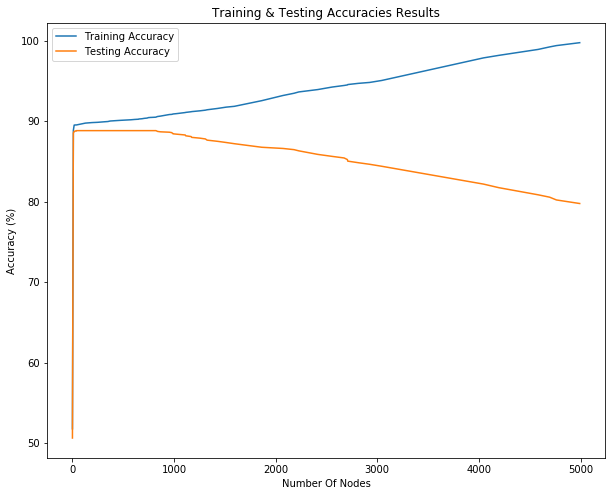

In [24]:
# plot the training and testing accuracies as a function of the number of nodes in the tree
plt.plot(nodes, training_accuracies, label='Training Accuracy')
plt.plot(nodes, testing_accuracies, label='Testing Accuracy')
plt.title('Training & Testing Accuracies Results')
plt.xlabel('Number Of Nodes')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.5, 0.25, 0.1, 0.05, 0.0001 (max pruning)]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the tuple (p-value, tree depth). Mark the best result on the graph with red circle. (15 points)

In [25]:
### Chi square table values ###
# The first key is the degree of freedom 
# The second key is the p-value cut-off
# The values are the chi-statistic that you need to use in the pruning
chi_table = {1: {0.5 : 0.45,
                 0.25 : 1.32,
                 0.1 : 2.71,
                 0.05 : 3.84,
                 0.0001 : 100000},
             2: {0.5 : 1.39,
                 0.25 : 2.77,
                 0.1 : 4.60,
                 0.05 : 5.99,
                 0.0001 : 100000},
             3: {0.5 : 2.37,
                 0.25 : 4.11,
                 0.1 : 6.25,
                 0.05 : 7.82,
                 0.0001 : 100000},
             4: {0.5 : 3.36,
                 0.25 : 5.38,
                 0.1 : 7.78,
                 0.05 : 9.49,
                 0.0001 : 100000},
             5: {0.5 : 4.35,
                 0.25 : 6.63,
                 0.1 : 9.24,
                 0.05 : 11.07,
                 0.0001 : 100000},
             6: {0.5 : 5.35,
                 0.25 : 7.84,
                 0.1 : 10.64,
                 0.05 : 12.59,
                 0.0001 : 100000},
             7: {0.5 : 6.35,
                 0.25 : 9.04,
                 0.1 : 12.01,
                 0.05 : 14.07,
                 0.0001 : 100000},
             8: {0.5 : 7.34,
                 0.25 : 10.22,
                 0.1 : 13.36,
                 0.05 : 15.51,
                 0.0001 : 100000},
             9: {0.5 : 8.34,
                 0.25 : 11.39,
                 0.1 : 14.68,
                 0.05 : 16.92,
                 0.0001 : 100000},
             10: {0.5 : 9.34,
                  0.25 : 12.55,
                  0.1 : 15.99,
                  0.05 : 18.31,
                  0.0001 : 100000},
             11: {0.5 : 10.34,
                  0.25 : 13.7,
                  0.1 : 17.27,
                  0.05 : 19.68,
                  0.0001 : 100000}}

In [26]:
#### Your code here ####
chi_square_p_values = [1, 0.5, 0.25, 0.1, 0.05, 0.0001]
train_accuracy_results = []
test_accuracy_results = []
p_vals_depth = []

best_result_values = [0, 0, 0]  # [max accuracy, chi-value, tree-depth]

for chi in chi_square_p_values:
    # construct a tree and prune it according to the cut-off value
    chi_square_tree_i = build_tree(data=X_train, impurity=impurity_func, gain_ratio=gain_ratio, chi=chi)

    # compute the training and testing accuracy
    train_accuracy = calc_accuracy(chi_square_tree_i, X_train)
    test_accuracy = calc_accuracy(chi_square_tree_i, X_test)

    # store values for visualization
    train_accuracy_results.append(train_accuracy)
    test_accuracy_results.append(test_accuracy)
    p_vals_depth.append(str((chi, chi_square_tree_i.depth)))

    # compute the best accuracy result
    if test_accuracy > best_result_values[0]:
        best_result_values[0] = test_accuracy
        best_result_values[1] = chi
        best_result_values[2] = chi_square_tree_i.depth

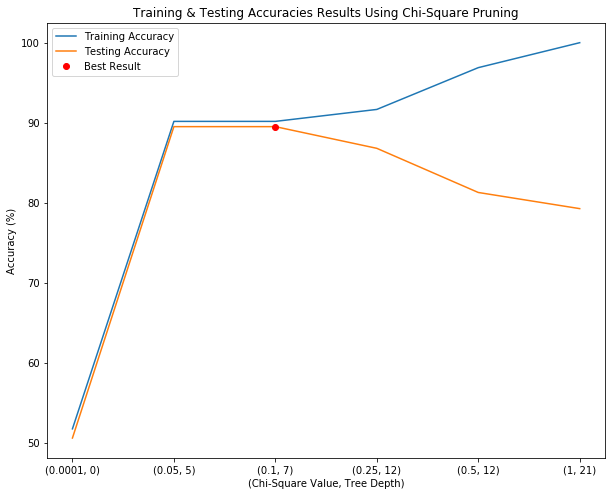

In [29]:
# visualization
best_result_index = test_accuracy_results.index(best_result_values[0])
plt.plot(p_vals_depth, train_accuracy_results, label='Training Accuracy')
plt.plot(p_vals_depth, test_accuracy_results, label='Testing Accuracy')
plt.plot(str((best_result_values[1], best_result_values[2])), best_result_values[0], 'o', c='r', label='Best Result')
plt.title('Training & Testing Accuracies Results Using Chi-Square Pruning')
plt.xlabel('(Chi-Square Value, Tree Depth)')
plt.ylabel('Accuracy (%)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_chi - the best tree according to chi square pruning

In [30]:
#### Your code here ####
tree_max_depth = build_tree(data=X_train, impurity=impurity_func, gain_ratio=gain_ratio, max_depth=max_depth)
tree_chi = build_tree(data=X_train, impurity=impurity_func, gain_ratio=gain_ratio, chi=best_result_values[1])

## Number of Nodes

Of the two trees above we will choose the one with fewer nodes. Complete the function counts_nodes and print the number of nodes in each tree. (5 points) 

In [31]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    count = 1
    for child in node.children:
        count += count_nodes(child)
    return count
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    

In [32]:
tree_max_depth_node_count = count_nodes(tree_max_depth)
tree_chi_node_count = count_nodes(tree_chi)
chosen_tree = None

print(f'The number of nodes in tree_max_depth (max_depth={max_depth}): {count_nodes(tree_max_depth)}')
print(f'The number of nodes in tree_chi (chi={best_result_values[1]}): {count_nodes(tree_chi)}')

if tree_max_depth_node_count < tree_chi_node_count:
    print(f'The tree_max_depth was chosen.')
    chosen_tree = tree_max_depth
else:
    print(f'The tree_chi was chosen.')
    chosen_tree = tree_chi

The number of nodes in tree_max_depth (max_depth=9): 2019
The number of nodes in tree_chi (chi=0.1): 89
The tree_chi was chosen.


## Print the tree

Complete the function `print_tree` and execute it on your chosen tree. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [34]:
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT', separator=''):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    if node.leaf:
        vals, counts = np.unique(node.data[:, -1], return_counts=True)
        if len(vals) > 1:
            print(f'{separator}[{parent_feature}={feature_val}, leaf]: [{{{vals[0]}: {counts[0]}, {vals[1]}: {counts[1]}}}]')
        else:
            print(f'{separator}[{parent_feature}={feature_val}, leaf]: [{{{vals[0]}: {counts[0]}}}]')
        return
    else:
        if parent_feature == 'ROOT':
            print(f'{separator}[{feature_val}, feature=X{node.feature}]')
        else:
            print(f'{separator}[{parent_feature}={feature_val}, feature=X{node.feature}]')
        for c in node.children:
            print_tree(c, depth + 1, f'X{node.feature}', c.value, separator + '\t')

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

In [35]:
print_tree(chosen_tree)

[ROOT, feature=X4]
	[X4=a, leaf]: [{e: 273, p: 31}]
	[X4=c, leaf]: [{e: 10, p: 137}]
	[X4=f, feature=X10]
		[X10=f, feature=X2]
			[X2=b, leaf]: [{e: 8, p: 30}]
			[X2=g, leaf]: [{e: 5, p: 26}]
			[X2=w, leaf]: [{e: 1, p: 35}]
		[X10=k, feature=X19]
			[X19=v, feature=X11]
				[X11=k, leaf]: [{e: 52, p: 520}]
				[X11=s, feature=X1]
					[X1=s, leaf]: [{e: 12, p: 43}]
					[X1=y, leaf]: [{e: 4, p: 43}]
			[X19=y, leaf]: [{e: 66, p: 431}]
		[X10=s, leaf]: [{e: 22, p: 310}]
	[X4=l, feature=X1]
		[X1=f, leaf]: [{e: 19, p: 1}]
		[X1=s, leaf]: [{e: 94, p: 16}]
		[X1=y, leaf]: [{e: 159, p: 10}]
	[X4=m, leaf]: [{e: 2, p: 25}]
	[X4=n, feature=X7]
		[X7=b, feature=X18]
			[X18=b, leaf]: [{e: 34, p: 2}]
			[X18=k, leaf]: [{e: 843, p: 93}]
			[X18=n, feature=X8]
				[X8=h, leaf]: [{e: 68, p: 8}]
				[X8=k, leaf]: [{e: 71, p: 5}]
				[X8=n, leaf]: [{e: 228, p: 23}]
				[X8=o, leaf]: [{e: 12}]
				[X8=p, feature=X2]
					[X2=e, leaf]: [{e: 45, p: 4}]
					[X2=g, feature=X1]
						[X1=f, leaf]: [{e: